In [1]:
import xarray as xr
import oceans.sw_extras.sw_extras as swe
from dask.diagnostics import ProgressBar

In [2]:
rootdir = '/projects/SOCCOM/datasets/gobai-o2/'
filename = 'GOBAI-O2-v1.0_processed.zarr'
# Load data
ds = xr.open_zarr(rootdir+filename)
# Calculate
ds['oxysat'] = xr.apply_ufunc(swe.o2sol_SP_pt_benson_krause_84,
                            ds['sal'],ds['temp'],dask='parallelized')
# Append to zarr store
with ProgressBar():
    ds.to_zarr(rootdir+filename,mode='a')

[########################################] | 100% Completed | 88.66 s


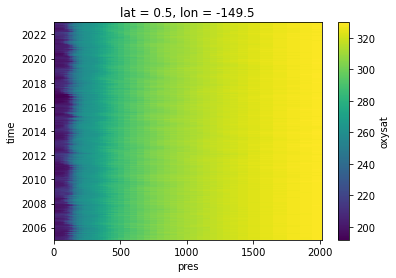

In [9]:
ds['oxysat'].sel(lon=-150,lat=0,method='nearest').plot()

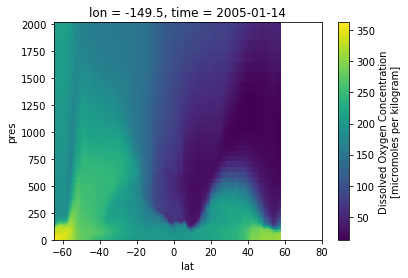

In [8]:
ds['oxy'].sel(lon=-150,method='nearest').isel(time=0).plot()